# Using Riding Patterns of Ford GoBike Riding Service to Determine The Lifestyle of Users
## by AKEEM Ridwanulahi Akeem


## Investigation Overview

In this report, I want to investigate how features like speed, distance, days can be used to determine the the lifestyle of the users of the Ford GoBike Riding Services. 


## Dataset Overview

The dataset contains information about he Ford GoBike System data which includes information about individual rides made in a bike sharing system covering the greater San Francisco Bay area. The dataset features 183412 rows and 17 columns and the columns were extended to 31 columns to provide room for more insightful variables which helped the investigation while the rows were pruned to 173272 rows after cleaning. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe -- the already cleaned data was loaded

bike_data = pd.read_csv('fordgobike_final_exploration_data.csv',sep=',')

In [3]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_time_year,end_time_month,end_time_week,end_time_day,end_time_year,start_time_hour,end_time_hour,duration_min,duration_hr,speed
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,2019,March,8,Friday,2019,17,8,869,14.50,0.04
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,2019,March,8,Friday,2019,12,5,1030,17.18,0.16
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,2019,March,8,Friday,2019,17,4,608,10.14,0.03
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,2019,March,8,Friday,2019,23,0,26,0.44,5.48
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,2019,March,8,Friday,2019,23,0,29,0.50,6.66


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Rides by hours of the day and day of the week

The number of rides per hour of the day and day of week can be observed in the chart below. From the chart, it can be seen that:

1. Most trips happens at 8th and 17th hour of the day - a proof that most users are working class and use it to commute to and fro work

2. We have more trips between Mondays and Fridays with Thursday having the most trip per day

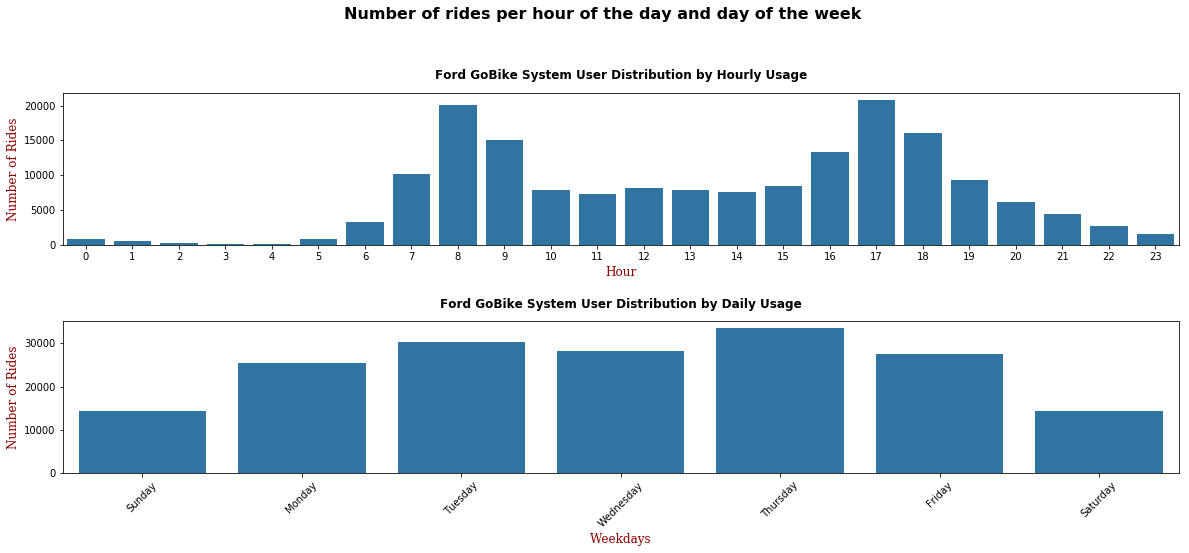

In [4]:
# Number of rides for each day of the week and each hour of the day

plt.figure(figsize=(20,7))
plt.suptitle('Number of rides per hour of the day and day of the week', y=1.05, fontsize=16, fontweight='bold');
font = {'family': 'serif', 'color': 'darkred','weight': 'normal','size': '12'}

plt.subplot(2,1,2)
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax = sns.countplot(x='start_time_day', data=bike_data, color=sns.color_palette()[0], order=weekdays)
plt.xlabel('Weekdays', fontdict=font)
plt.ylabel('Number of Rides', fontdict=font)
plt.title("Ford GoBike System User Distribution by Daily Usage", y=1.05, fontsize=12, fontweight='bold')
plt.xticks(rotation=45);

plt.subplot(2,1,1)
ax = sns.countplot(x='start_time_hour', data=bike_data, color=sns.color_palette()[0])
plt.xlabel('Hour', fontdict=font)
plt.ylabel('Number of Rides', fontdict=font)
plt.title("Ford GoBike System User Distribution by Hourly Usage", y=1.05, fontsize=12, fontweight='bold')
plt.xticks(rotation=0);

plt.subplots_adjust(hspace=0.5)

## Relationship between speed, distance, duration and category of the users of the service

The chart below show the relationship between the speed, distance, duration in respect to the category of users in order to understand the riding patterns of users and define them properly. The observations can be made from the chart:

1. The customer category of users can be observed to ride slower over a longer distance for a longer period of time giving credence that the customers are not working class people but people on leisure probably tourists who came on vacation

2. The Subscriber category of users can be observed to ride faster for a short of period of time over a short distance which is in complete opposition to the customers' riding pattern giving credence that the subscribers are working class people living and working with the area.

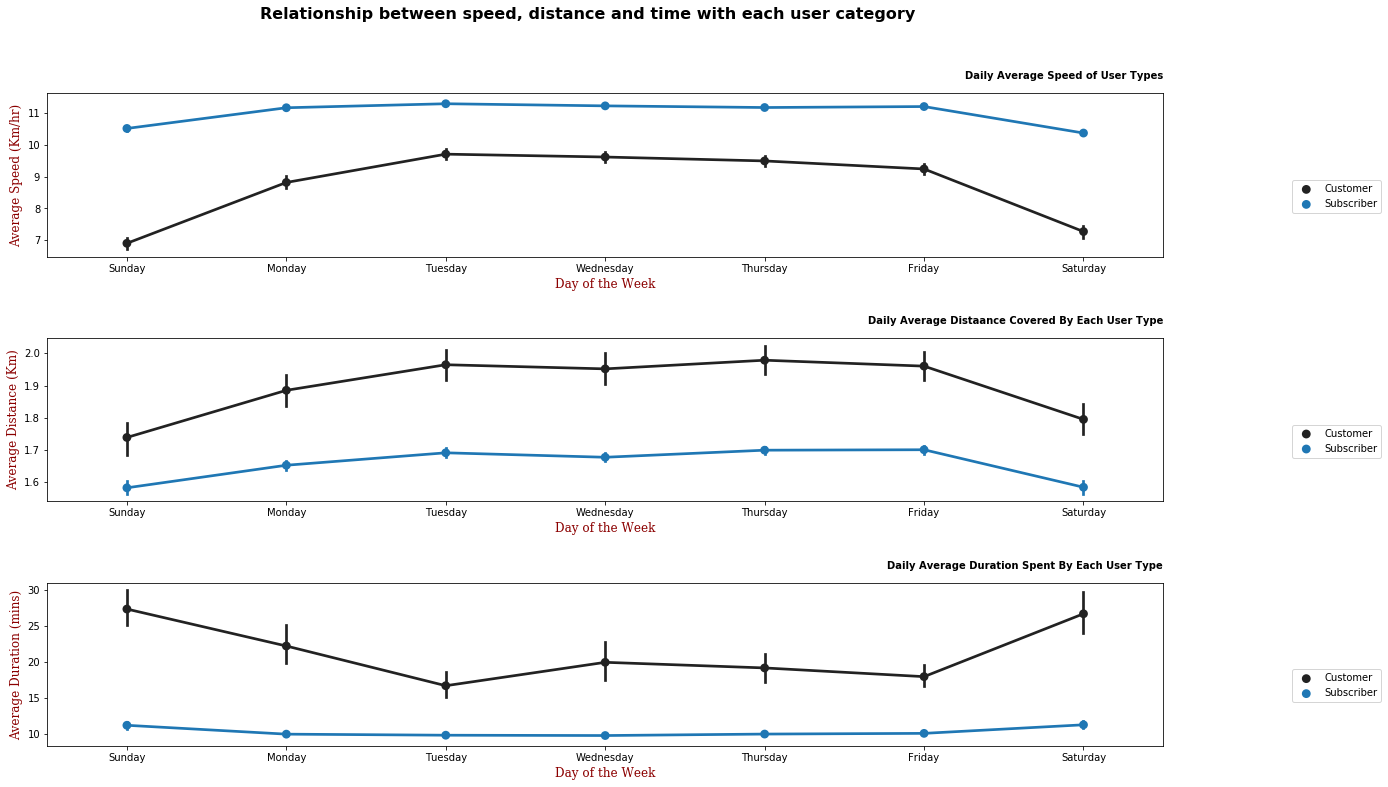

In [6]:
plt.figure(figsize=(20,12))
plt.suptitle('Relationship between speed, distance and time with each user category',fontsize=16, fontweight='bold');
font = {'family': 'serif', 'color': 'darkred','weight': 'normal','size': '12'}

plt.subplot(3,1,1)
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax = sns.pointplot(x='start_time_day', y='speed', hue='user_type', data=bike_data, color=sns.color_palette()[0],dodge=False,order=weekdays)
plt.xlabel('Day of the Week', fontdict=font)
plt.ylabel('Average Speed (Km/hr)', fontdict=font)
plt.title("Daily Average Speed of User Types", y=1.05, fontsize=10, fontweight='bold', loc='right')
plt.legend(loc='best', bbox_to_anchor=(1.2, 0.5))
plt.xticks(rotation=0);


plt.subplot(3,1,2)
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax = sns.pointplot(x='start_time_day', y='distance', hue='user_type', data=bike_data, color=sns.color_palette()[0],dodge=False, order=weekdays)
plt.xlabel('Day of the Week', fontdict=font)
plt.ylabel('Average Distance (Km)', fontdict=font)
plt.title("Daily Average Distaance Covered By Each User Type", y=1.05, fontsize=10, fontweight='bold', loc='right')
plt.legend(loc='best', bbox_to_anchor=(1.2, 0.5))
plt.xticks(rotation=0);

plt.subplot(3,1,3)
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax = sns.pointplot(x='start_time_day', y='duration_min', hue='user_type', data=bike_data, color=sns.color_palette()[0],dodge=False,order=weekdays)
plt.xlabel('Day of the Week', fontdict=font)
plt.ylabel('Average Duration (mins)', fontdict=font)
plt.title("Daily Average Duration Spent By Each User Type", y=1.05, fontsize=10, fontweight='bold', loc='right')
plt.legend(loc='best', bbox_to_anchor=(1.2, 0.5))
plt.xticks(rotation=0);

plt.subplots_adjust(hspace=0.5);

## Determining The Most Active Days for Each Category of User

The chart below shows the days each category of users were more active. From the chart below, it can be shown:

1. The Subscribers are more active between Monday and Friday emphasising the point that subscribers are workers who commute the bikes to and fro work

2. The Customers are more active on Saturdays and Sundays emphasising the point that the customers are leisure seekers most likely tourists who came to tour the area.



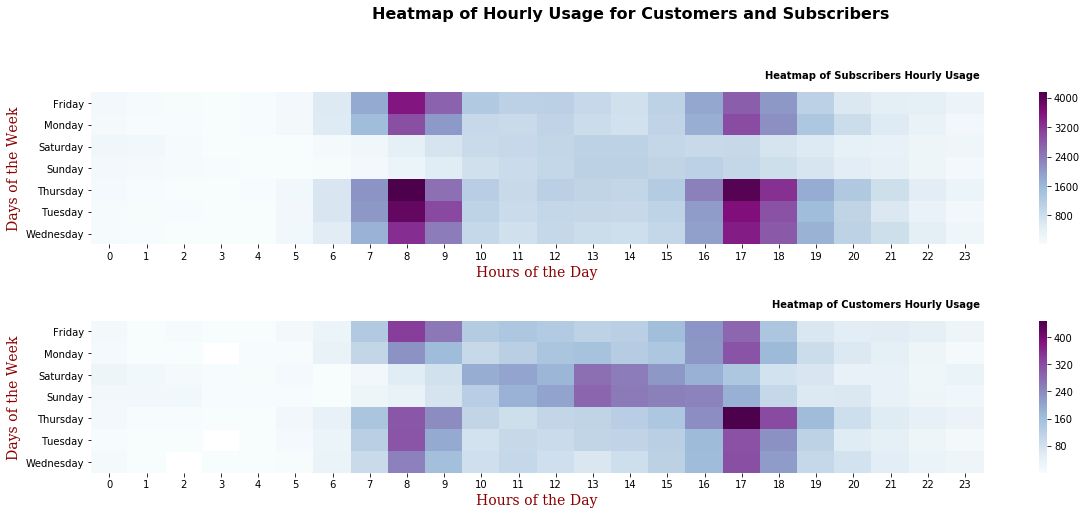

In [7]:
plt.figure(figsize=(20,7))
plt.suptitle('Heatmap of Hourly Usage for Customers and Subscribers', y=1.05, fontsize=16, fontweight='bold');
font = {'family': 'serif', 'color': 'darkred','weight': 'normal','size': '14'}

plt.subplot(2,1,1)
sub_data = bike_data.query('user_type == "Subscriber"')
sub = sub_data.groupby(['start_time_day', 'start_time_hour']).size().reset_index(name='count').pivot(index='start_time_day', columns='start_time_hour', values='count')
sns.heatmap(sub,cmap='BuPu')
plt.xlabel('Hours of the Day', fontdict=font)
plt.ylabel('Days of the Week', fontdict=font)
plt.title("Heatmap of Subscribers Hourly Usage ", y=1.05, fontsize=10, fontweight='bold', loc='right');

plt.subplot(2,1,2)
cust_data = bike_data.query('user_type == "Customer"')
cust = cust_data.groupby(['start_time_day', 'start_time_hour']).size().reset_index(name='count').pivot(index='start_time_day', columns='start_time_hour', values='count')
sns.heatmap(cust,cmap='BuPu')
plt.xlabel('Hours of the Day', fontdict=font)
plt.ylabel('Days of the Week', fontdict=font)
plt.title("Heatmap of Customers Hourly Usage ", y=1.05, fontsize=10, fontweight='bold', loc='right')
plt.subplots_adjust(hspace=0.5);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert fordgobike_slides.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook fordgobike_slides.ipynb to slides
[NbConvertApp] Writing 502936 bytes to fordgobike_slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/fordgobike_slides.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not fou

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
